In [45]:
import numpy as np # linear algebra
import pandas as pd # data manipulation and analysis
import matplotlib.pyplot as plt # data visualization
import seaborn as sns # data visualization
sns.set_style('whitegrid') # set style for visualization
import warnings # ignore warnings
warnings.filterwarnings('ignore')
import requests, zipfile, io
from sklearn.impute import KNNImputer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
import scipy as sp
from scipy import stats

# Loading Dataset

In [46]:
# Load file into Pandas Dataframe
df = pd.read_csv(r"C:\Users\nivya\Downloads\ML_DATA.zip")
print(df.shape)
df.head()

(569, 33)


,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


# EDA

In [47]:
# Drop Unecessary Columns
df = df.drop(columns=['Unnamed: 32', 'id'])

# Column Info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   diagnosis                569 non-null    object 
 1   radius_mean              569 non-null    float64
 2   texture_mean             569 non-null    float64
 3   perimeter_mean           569 non-null    float64
 4   area_mean                569 non-null    float64
 5   smoothness_mean          569 non-null    float64
 6   compactness_mean         569 non-null    float64
 7   concavity_mean           569 non-null    float64
 8   concave points_mean      569 non-null    float64
 9   symmetry_mean            569 non-null    float64
 10  fractal_dimension_mean   569 non-null    float64
 11  radius_se                569 non-null    float64
 12  texture_se               569 non-null    float64
 13  perimeter_se             569 non-null    float64
 14  area_se                  5

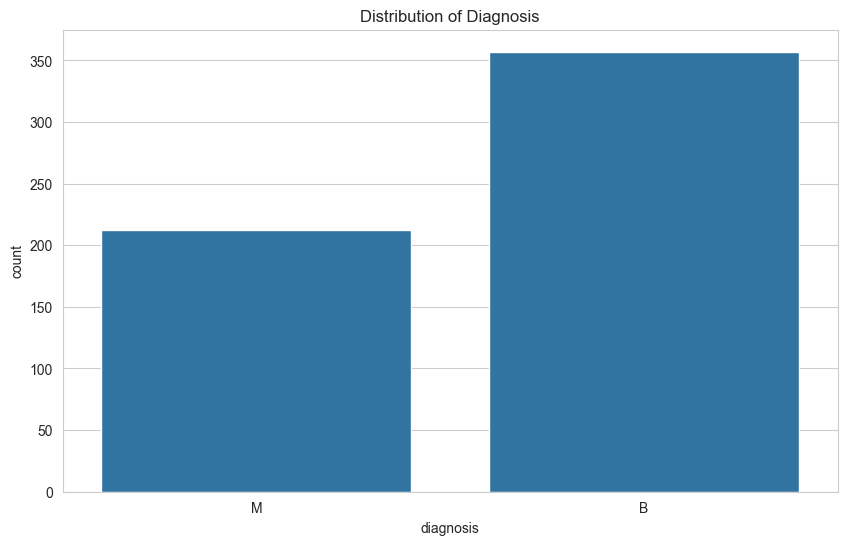

In [48]:
# Create a Countplot to display diagnosis from magma
plt.figure(figsize=(10,6))
sns.countplot(df, x=df['diagnosis'])
plt.title('Distribution of Diagnosis')
plt.show()

# Data Preprocessing

In [49]:
# Counts of Unique Rows in 'Diagnosis' Column
counts = df['diagnosis'].value_counts()
print(f"Malignant Cases: {counts[1]} ({(counts[1]/ (counts[0] + counts[1])):.2f})")
print(f"Benign Cases: {counts[0]} ({(counts[0]/ (counts[0] + counts[1])):.2f})")

Malignant Cases: 212 (0.37)
Benign Cases: 357 (0.63)


In [50]:
# Map Categorical Values to Numerical
mapping = {
    'M' : 1,
    'B' : 0
}

# Map based on the created mapping
df['diagnosis'] = df['diagnosis'].map(mapping)

# Check
df['diagnosis'].value_counts()

diagnosis
0    357
1    212
Name: count, dtype: int64

In [51]:
# Prep for Modeling
# First, separate between features and target columns
X = df.drop(columns='diagnosis')
y = df['diagnosis']

# Then, Split the data into Training/Testing
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

# Check to Ensure Split Worked Properly
print(X_train.shape, X_test.shape)

(455, 30) (114, 30)


# Creating Models

## Logistic Regression Model

In [52]:
from sklearn.metrics import accuracy_score
# Create Instance of a Logistic Regression Model
logreg = LogisticRegression()

# Fit the Model to Our Data
logreg.fit(X_train, y_train)

# Make Predictions
y_pred = logreg.predict(X_test)

# Check
print("Accuracy:", accuracy_score(y_test, y_pred))

Accuracy: 0.9210526315789473


## K Nearest Neighbors Model

In [53]:
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# Scaling Features is crucial for KNN Models
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Create and Train KNN Model
# Initialize the model (k=5 is a common starting point)
knn = KNeighborsClassifier(n_neighbors=5)

# Train the model
knn.fit(X_train_scaled, y_train)

# Make Predictions
y_pred = knn.predict(X_test_scaled)

# Check
print("Accuracy:", accuracy_score(y_test, y_pred))

Accuracy: 0.956140350877193


In [54]:
# Test different k values
k_values = range(1, 31)
accuracies = []

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train_scaled, y_train)
    y_pred = knn.predict(X_test_scaled)
    accuracies.append(accuracy_score(y_test, y_pred))

# Find optimal k
optimal_k = k_values[np.argmax(accuracies)]
print(f'Optimal k: {optimal_k}')

Optimal k: 5


# Random Forest Model

In [57]:
from sklearn.ensemble import RandomForestClassifier

for n in [5,10, 50, 100, 200, 250, 300, 400, 500]:
    model = RandomForestClassifier(n_estimators=n, random_state=42)
    model.fit(X_train, y_train)
    acc = accuracy_score(y_test, model.predict(X_test))
    print(f"{n} trees → test accuracy {acc:.7f}")

5 trees → test accuracy 0.9649123
10 trees → test accuracy 0.9649123
50 trees → test accuracy 0.9736842
100 trees → test accuracy 0.9736842
200 trees → test accuracy 0.9649123
250 trees → test accuracy 0.9736842
300 trees → test accuracy 0.9736842
400 trees → test accuracy 0.9736842
500 trees → test accuracy 0.9736842


# Support Vector Machines

In [56]:
from sklearn.svm import SVC

# Instantiate the SVM with RBF kernel and manual hyperparameters
svm_model = SVC(kernel='rbf', C=1.0, gamma='scale', random_state=42)

# Training the SVM Model (Using Scaled Parameters)
svm_model.fit(X_train_scaled, y_train)

# Predict on the scaled test data
y_pred = svm_model.predict(X_test_scaled)

# Evaluate 
print("Accuracy:", accuracy_score(y_test, y_pred))

Accuracy: 0.9736842105263158


# Which is the best model?

- The model with the highest accuracy was the RandomForestsClassifier Model and Support Vector Machines that both had an accuracy of about 97.37%

# 